In [1]:
import os,sys,cv2,time

In [2]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPool2D,Dense
from keras.preprocessing import image
import tensorflow as tf
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

Using TensorFlow backend.


In [3]:
image_gen=ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            rescale=1/255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

In [4]:
image_gen.flow_from_directory('data/train/')

Found 1301 images belonging to 2 classes.


In [5]:
model=Sequential()

In [6]:
#model 

In [7]:
input_shape=(150,150,1)

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)              0         
__________

In [8]:
batch_size=16
train_image_gen=image_gen.flow_from_directory('data/train/',
                                             target_size=input_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='binary')
test_image_gen=image_gen.flow_from_directory('data/test/',
                                             target_size=input_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 1301 images belonging to 2 classes.
Found 1301 images belonging to 2 classes.


In [9]:
train_image_gen.class_indices #test class

{'female': 0, 'male': 1}

In [10]:
#training model
# epochs and step_per epoch number
result=model.fit_generator(train_image_gen,epochs=3,
                            steps_per_epoch=1000,
                           validation_data=test_image_gen,validation_steps=12)

Epoch 1/3
1000/1000 [==============================] - 323s 323ms/step - loss: 0.0998 - acc: 0.9590 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 2/3
1000/1000 [==============================] - 430s 430ms/step - loss: 0.0114 - acc: 0.9963 - val_loss: 1.4813e-04 - val_acc: 1.0000
Epoch 3/3
1000/1000 [==============================] - 417s 417ms/step - loss: 0.0141 - acc: 0.9967 - val_loss: 0.0389 - val_acc: 0.9844


Model Saved


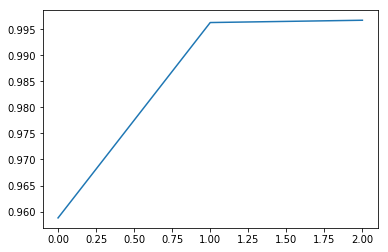

In [32]:
model.save_weights("models/male_female_weights.h5") #save model weight
model.save("models/male_female_model.h5") #save model
print("Model Saved")






result.history['acc']
plt.plot(result.history['acc'])
#plt.show()

In [33]:
new_model=load_model('models/male_female_model.h5')
man_file='picture/man3.jpg'
woman_file='picture/woman3.jpg'
man_image=image.load_img(man_file,target_size=(150,150))
woman_image=image.load_img(woman_file,target_size=(150,150))
man_image=image.img_to_array(man_image)
woman_image=image.img_to_array(woman_image)
#-------------------------------------------
man_image=np.expand_dims(man_image,axis=0)
woman_image=np.expand_dims(woman_image,axis=0)
man_image=man_image/255
woman_image=woman_image/255
print(man_image.shape)
print(woman_image.shape)

a=model.predict_classes(man_image)
b=model.predict_classes(woman_image)

AttributeError: 'numpy.ndarray' object has no attribute 'load_img'

In [13]:
print(a)


[[1]]


In [14]:
print(b)

[[0]]


In [15]:
a=model.predict_classes(man_image)
b=model.predict_classes(woman_image)
if a==0:
    print('I am a woman')
else:
    print('I am a man')



I am a man


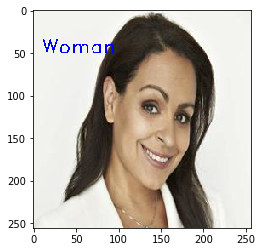

In [83]:

img=cv2.imread('picture/woman1.jpg',1)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
_file="picture/woman1.jpg"
images=image.load_img(_file,target_size=(150,150))
images=image.img_to_array(images)
images=np.expand_dims(images,axis=0)
images=images/255
test_model=load_model('models/male_female_model.h5')
prediction=test_model.predict_classes(images)
if prediction==0:
    img =cv2.putText(img=np.copy(img), text="Woman", org=(10,50),fontFace=2, fontScale=0.75, color=(0,0,255), thickness=1)
elif prediction==1:
    img =cv2.putText(img=np.copy(img), text="Man", org=(10,50),fontFace=2, fontScale=0.75, color=(0,0,255), thickness=1)
plt.imshow(img)
plt.show()



